In [2]:
import torch 
import matplotlib.pyplot as plt
import pandas as pd


What needs to be done:
Split data into train and test
Build the model
...

In [3]:
math_file = pd.read_csv("Dataset\student-mat.csv")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\octav\AppData\Local\Temp\ipykernel_27484\351064590.py:1: SyntaxWarning: invalid escape sequence '\s'
  math_file = pd.read_csv("Dataset\student-mat.csv")


In [4]:
math = pd.DataFrame(math_file)

In [5]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
math['school'].unique()
math['school']

0      GP
1      GP
2      GP
3      GP
4      GP
       ..
390    MS
391    MS
392    MS
393    MS
394    MS
Name: school, Length: 395, dtype: object

In [7]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
math.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

In [9]:

math['school'].unique

<bound method Series.unique of 0      GP
1      GP
2      GP
3      GP
4      GP
       ..
390    MS
391    MS
392    MS
393    MS
394    MS
Name: school, Length: 395, dtype: object>

In [10]:

math['school'] = math['school'].replace({'GP': 1, 'MS': 0})


C:\Users\octav\AppData\Local\Temp\ipykernel_27484\4049874228.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  math['school'] = math['school'].replace({'GP': 1, 'MS': 0})


In [11]:

math['sex'] = math['sex'].replace({'M': 1, 'F': 0})

C:\Users\octav\AppData\Local\Temp\ipykernel_27484\326836344.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  math['sex'] = math['sex'].replace({'M': 1, 'F': 0})


In [12]:
math['address'].unique()

array(['U', 'R'], dtype=object)

In [13]:
math['address'] = math["address"].replace({'U':1,'R':0})

C:\Users\octav\AppData\Local\Temp\ipykernel_27484\1901589039.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  math['address'] = math["address"].replace({'U':1,'R':0})


In [14]:
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
# Apply the mapping to all the columns at once
math[binary_columns] = math[binary_columns].applymap({'yes': 1, 'no': 0}.get)


C:\Users\octav\AppData\Local\Temp\ipykernel_27484\1140950220.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  math[binary_columns] = math[binary_columns].applymap({'yes': 1, 'no': 0}.get)


In [15]:
math['Pstatus'] = math['Pstatus'].replace({'T':1, 'A':0})

C:\Users\octav\AppData\Local\Temp\ipykernel_27484\622226404.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  math['Pstatus'] = math['Pstatus'].replace({'T':1, 'A':0})


In [16]:
math[binary_columns]

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,1,0,0,0,1,1,0,0
1,0,1,0,0,0,1,1,0
2,1,0,1,0,1,1,1,0
3,0,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...
390,0,1,1,0,1,1,0,0
391,0,0,0,0,0,1,1,0
392,0,0,0,0,0,1,0,0
393,0,0,0,0,0,1,1,0


In [17]:
# List of columns to drop
columns_to_drop = [ 'health', 'freetime', 'goout', 'Dalc', 'Walc', 'absences']

# Drop the columns
math = math.drop(columns=columns_to_drop)


In [18]:
math['famsize'] = math['famsize'].replace({'GT3': 1, 'LE3': 0})

C:\Users\octav\AppData\Local\Temp\ipykernel_27484\369839254.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  math['famsize'] = math['famsize'].replace({'GT3': 1, 'LE3': 0})


In [19]:
math = pd.get_dummies(math, columns=['Mjob', 'Fjob', 'reason', 'guardian'])

In [20]:
multi_value_columns = ['Fjob_other', 'Fjob_services', 'Fjob_teacher', 
                       'reason_course', 'reason_home', 'reason_other', 
                       'reason_reputation', 'guardian_father', 
                       'guardian_mother', 'guardian_other']

# Check the unique values in the columns to inspect their types
print(math[multi_value_columns].nunique())
math[multi_value_columns] = math[multi_value_columns].astype(int)
# If the values are boolean (True/False), convert them to 1 and 0
math[multi_value_columns] = math[multi_value_columns].replace({'True': 1, 'False': 0})

Fjob_other           2
Fjob_services        2
Fjob_teacher         2
reason_course        2
reason_home          2
reason_other         2
reason_reputation    2
guardian_father      2
guardian_mother      2
guardian_other       2
dtype: int64


In [21]:
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,0,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,0,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,0,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,0,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [22]:
import seaborn as sns
cor_matrix  = math.corr()



<Axes: >

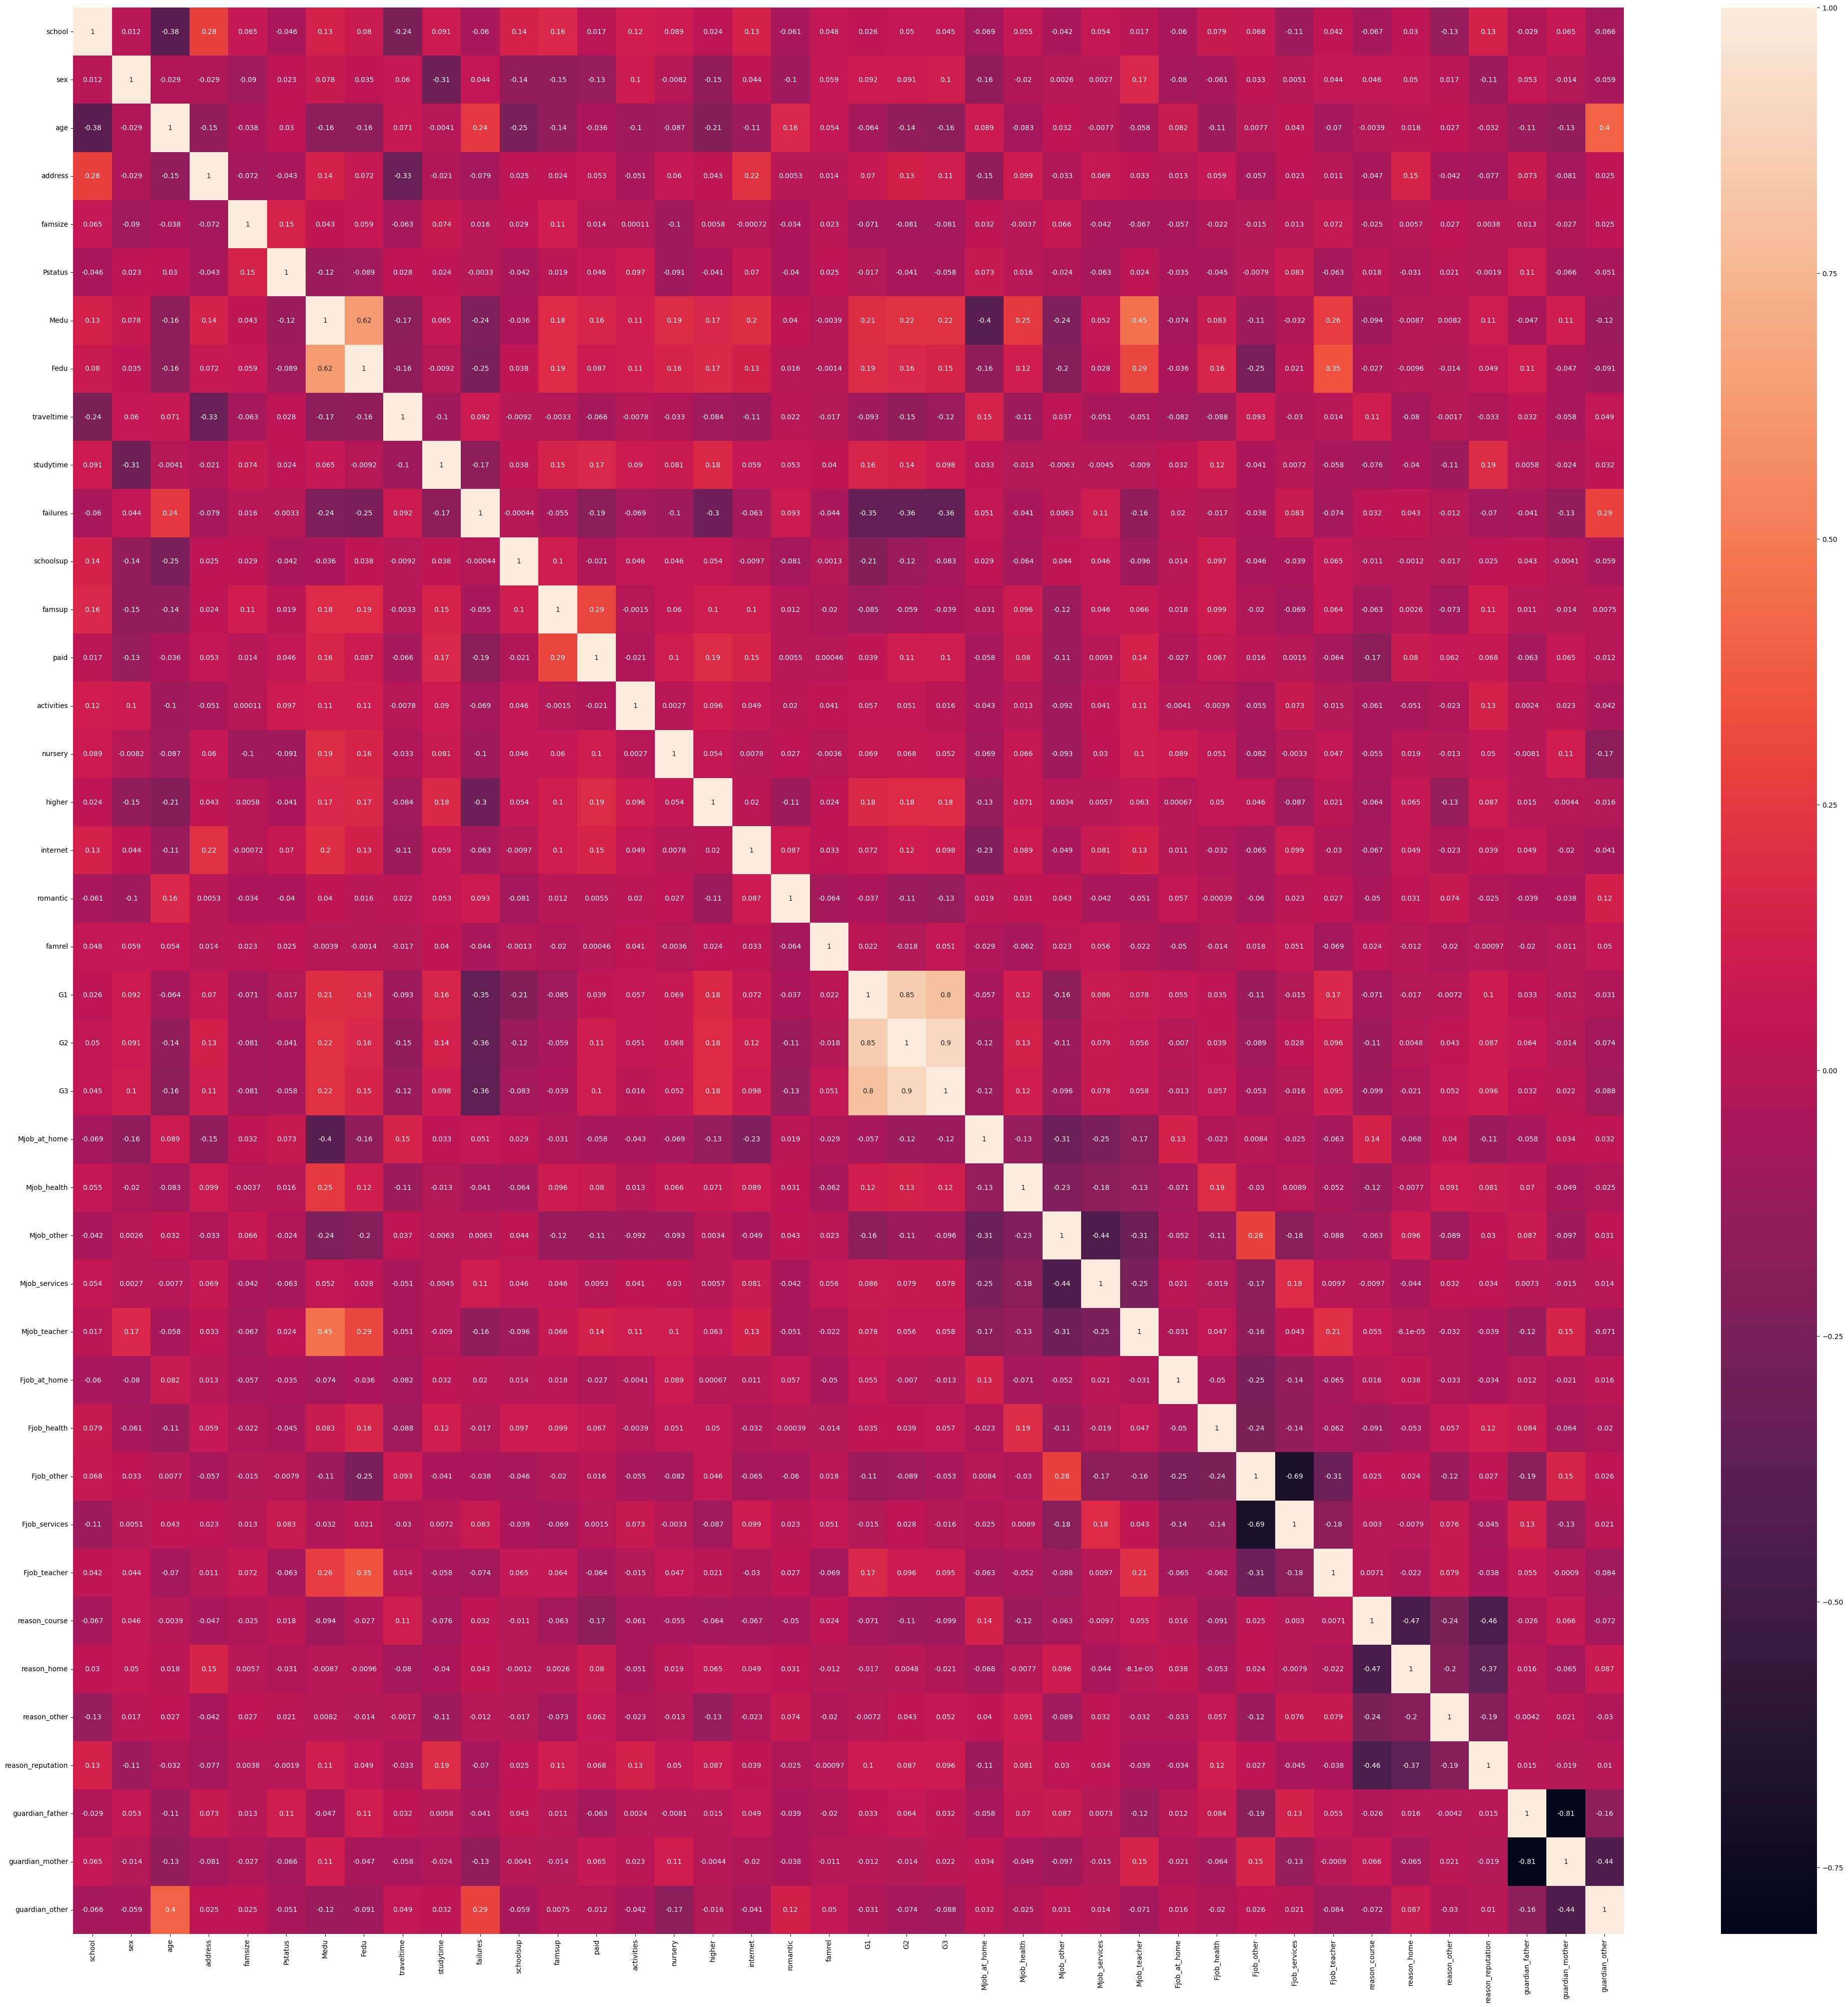

In [23]:
fig_size = plt.figure(figsize = (50,50))
sns.heatmap(cor_matrix,annot=True)


In [24]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'G1', 'G2', 'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [25]:
math = math.drop([ 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other' ],axis=1)


In [26]:
train_split = int(0.8* len(math))

In [27]:
math

,Medu,Fedu,failures,G1,G2,G3
0,4,4,0,5,6,6
1,1,1,0,5,5,6
2,1,1,3,7,8,10
3,4,2,0,15,14,15
4,3,3,0,6,10,10
...,...,...,...,...,...,...
390,2,2,2,9,9,9
391,3,1,0,14,16,16
392,1,1,3,10,8,7
393,3,2,0,11,12,10


In [28]:
from sklearn.model_selection import train_test_split

X = math.drop(['G3'],axis=1)
y= math['G3']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 


In [29]:
X_train.shape

(316, 5)

In [30]:
X_test.shape

(79, 5)

In [31]:
from torch import nn

In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
model_0 = LinearRegression()
model_0.fit(X_train,y_train)

LinearRegression()

In [35]:
pred = model_0.predict(X_test)

array([ 6.26761332, 12.07848851,  3.31263849,  8.6171303 ,  7.66062776,
       12.91194308, 18.73768854,  6.66356231,  7.64323911, 12.69845474,
       14.93289596,  6.45585958, 14.22348303, 11.94383751, 14.51014187,
        7.710624  ,  6.48370702, 10.85157153, 15.14059869,  8.72393386,
       14.11101262, 16.46370987, 15.45618562,  5.00388302,  8.40364196,
       19.93663931, 10.81793847,  9.37174753, 17.32513066, 11.49323598,
        7.90568135,  7.49123126, 15.41676695, 12.84467697,  6.30385173,
        4.08895394, -1.86913716, 15.08490381, 12.27570065,  7.22196107,
        4.62636502, 10.41290483, 14.11101262,  7.66062776, 15.59083662,
       10.14806298, 11.75819661, 13.83232598, 12.55223251, 15.52357051,
       13.20438755, 15.27054472, 10.45822789,  8.36422328,  4.17621406,
       12.61949862, 10.02390257,  6.19126255, 15.60240786, 16.4974617 ,
       12.76572085,  8.39785634,  6.2618277 ,  4.20984712,  5.57240877,
       17.02111496,  7.86035829,  9.73145811,  9.66997761, 15.41

In [36]:
predictions_series = pd.Series(pred)

In [55]:
predictions_series

0      6.267613
1     12.078489
2      3.312638
3      8.617130
4      7.660628
        ...    
74    10.812153
75     5.515601
76     8.763353
77    14.628517
78     3.019862
Length: 79, dtype: float64

In [37]:
acc =model_0.score(X_test,y_test)

In [68]:
# Accessing the weights (coefficients) and intercept in scikit-learn LinearRegression
print("Model Coefficients (Weights):", model_0.coef_)
print("Model Intercept (Bias):", model_0.intercept_)
model_params = model_0.coef_,model_0.intercept_


Model Coefficients (Weights): [ 0.15200785 -0.18564091 -0.45854193  0.14622223  0.97389119]
Model Intercept (Bias): -1.4360430502161492


In [38]:
print(acc)

0.7759174061850449
